# **Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# **Data Reading**

In [4]:
data = pd.read_csv("/kaggle/input/football-players-data/fifa_players.csv")
data.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


# **Data Exploration**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [6]:
print(data.describe())


                age     height_cm    weight_kgs  overall_rating     potential  \
count  17954.000000  17954.000000  17954.000000    17954.000000  17954.000000   
mean      25.565445    174.946921     75.301047       66.240169     71.430935   
std        4.705708     14.029449      7.083684        6.963730      6.131339   
min       17.000000    152.400000     49.900000       47.000000     48.000000   
25%       22.000000    154.940000     69.900000       62.000000     67.000000   
50%       25.000000    175.260000     74.800000       66.000000     71.000000   
75%       29.000000    185.420000     79.800000       71.000000     75.000000   
max       46.000000    205.740000    110.200000       94.000000     95.000000   

         value_euro      wage_euro  international_reputation(1-5)  \
count  1.769900e+04   17708.000000                   17954.000000   
mean   2.479280e+06    9902.134628                       1.111674   
std    5.687014e+06   21995.593750                       0.3921

Check for duplications

In [7]:
data.duplicated().sum()

0

Check for missing values

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

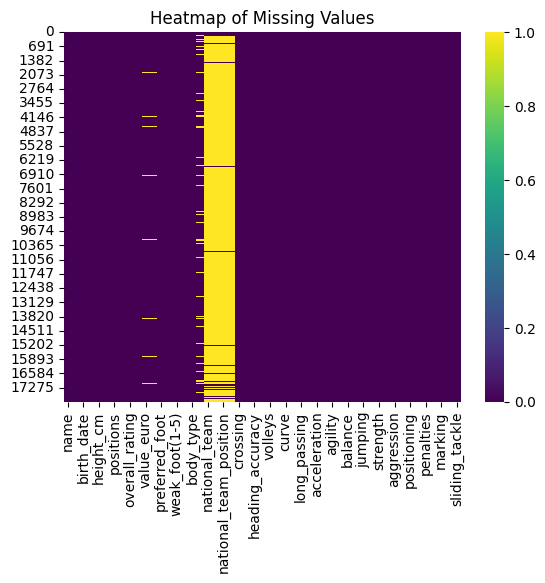

In [9]:
sns.heatmap(data.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

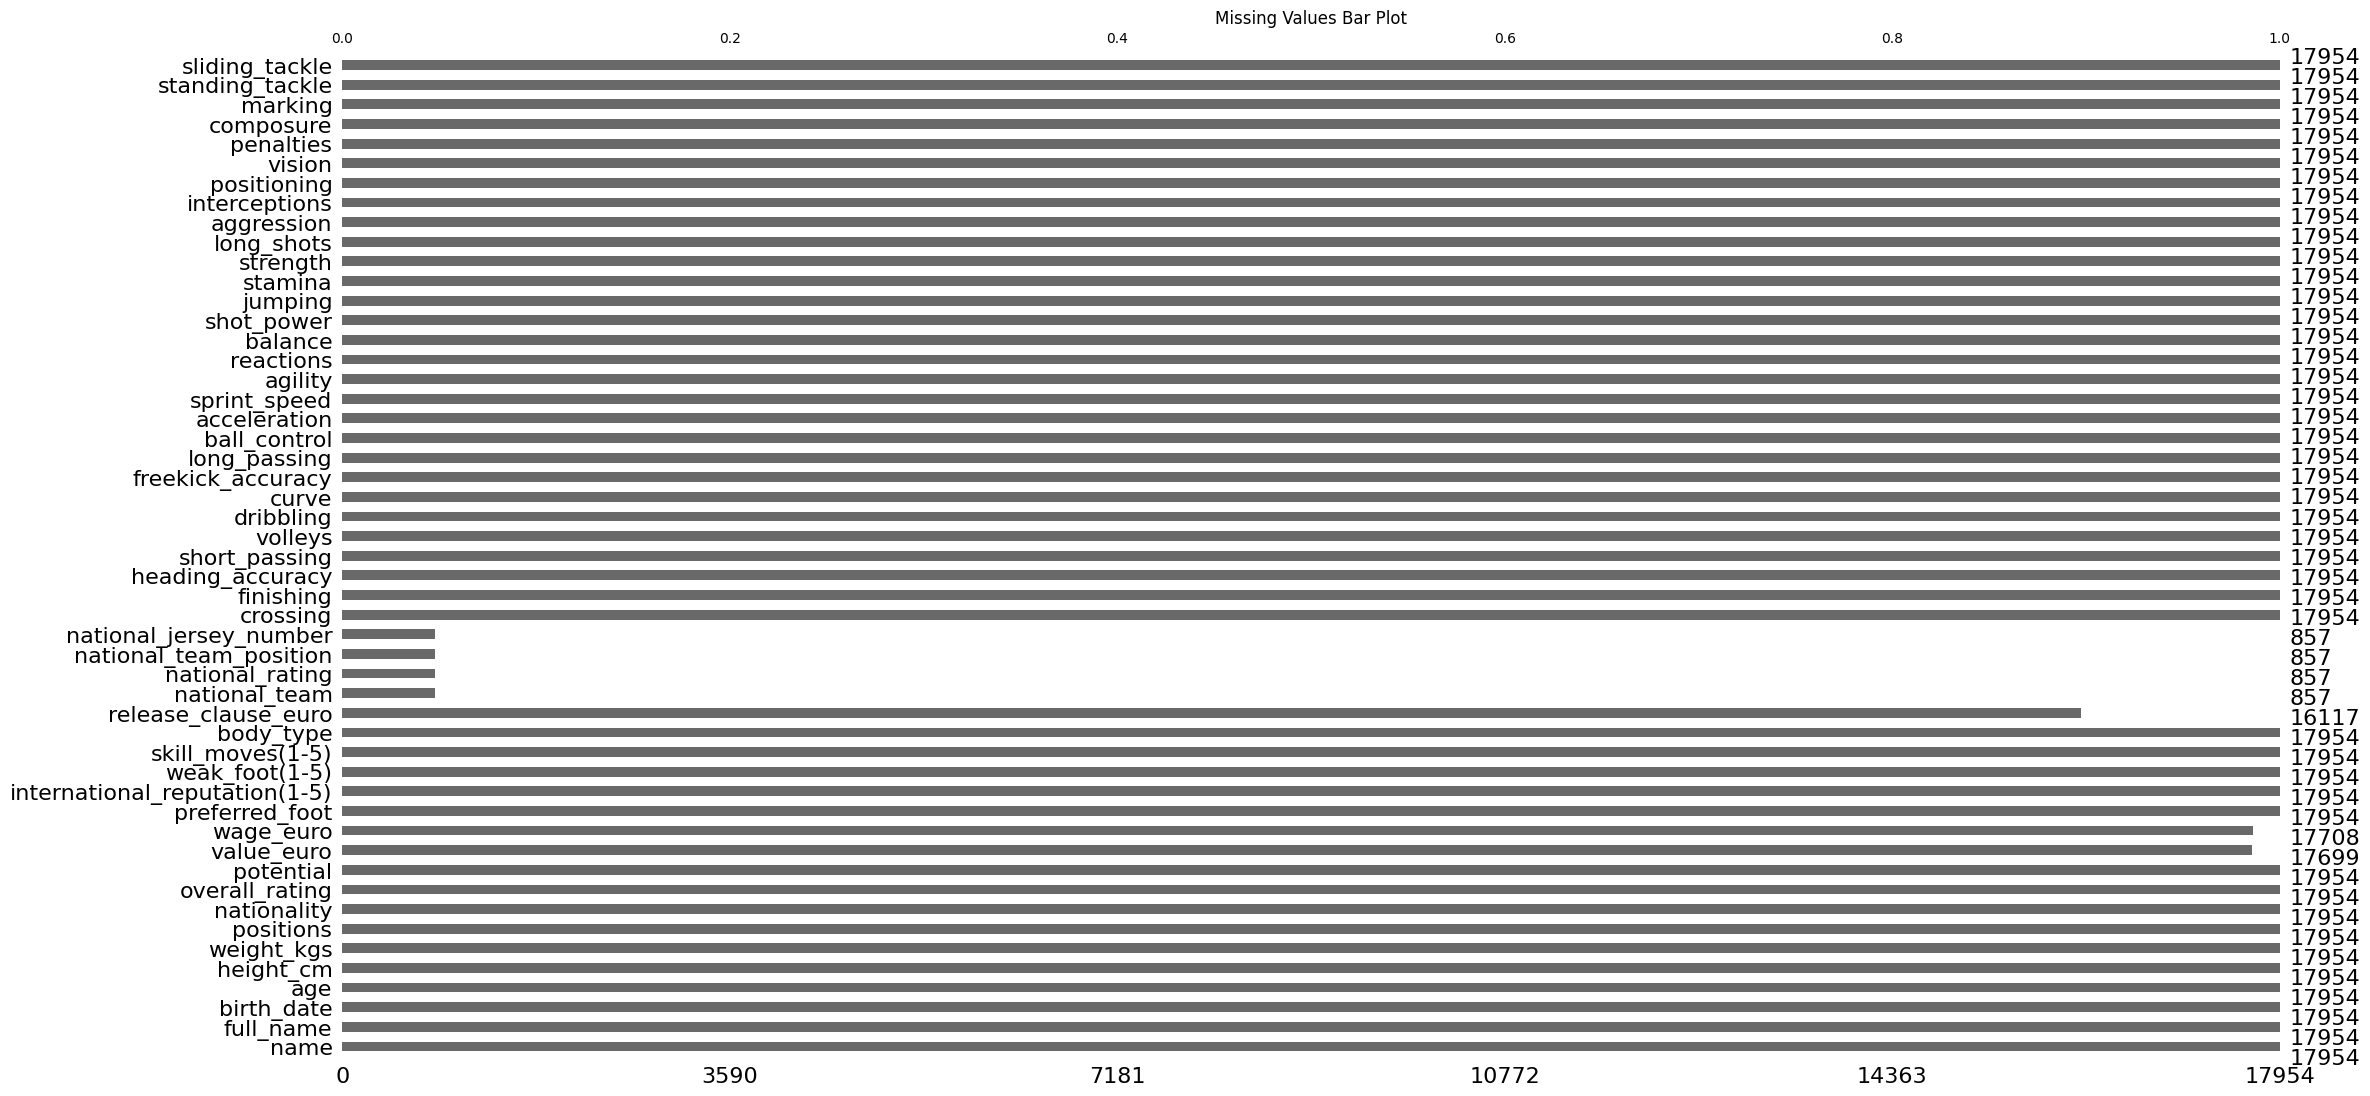

In [10]:
import missingno as msno
msno.bar(data)
plt.title('Missing Values Bar Plot')
plt.show()

In [11]:
print("Dataset Shape :",data.shape)

Dataset Shape : (17954, 51)


# **Data Visualization**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

<Axes: xlabel='national_rating', ylabel='age'>

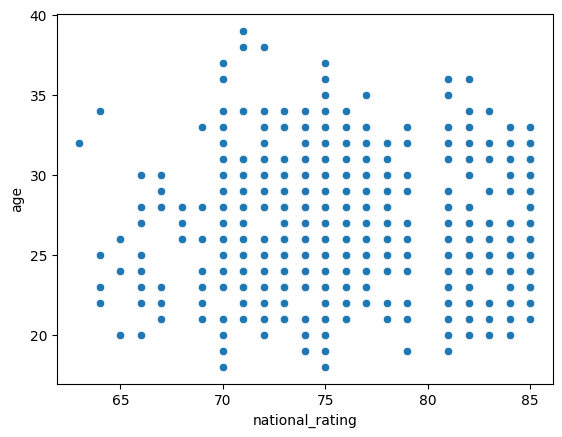

In [13]:
sns.scatterplot(data=data, x="national_rating", y="age")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Age Distribution'}, xlabel='Count', ylabel='age'>

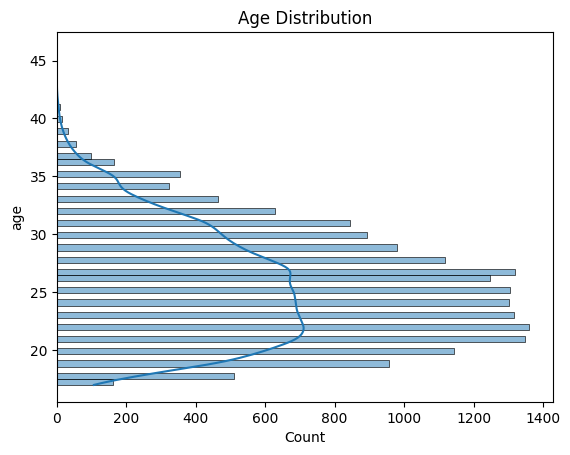

In [14]:
plt.title("Age Distribution")
sns.histplot(data=data , y='age',kde=True)

<Axes: xlabel='international_reputation(1-5)', ylabel='value_euro'>

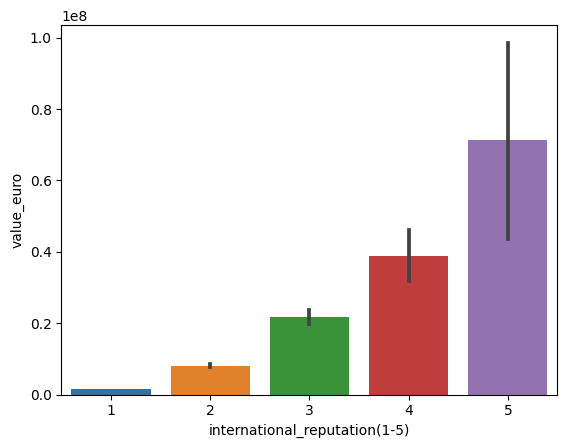

In [15]:
sns.barplot(data=data , x='international_reputation(1-5)', y='value_euro')

<Axes: xlabel='sprint_speed', ylabel='stamina'>

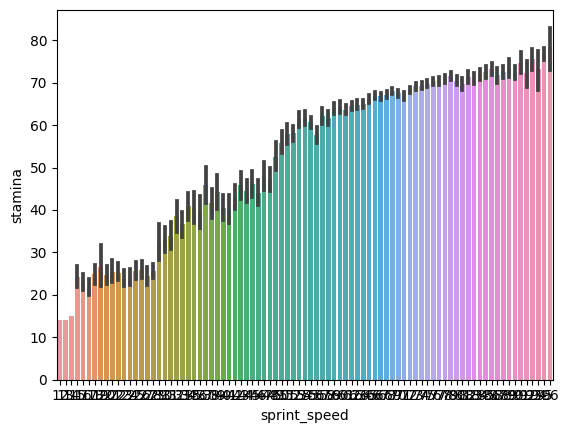

In [16]:
sns.barplot(data=data , x='sprint_speed', y='stamina')

<Axes: xlabel='value_euro'>

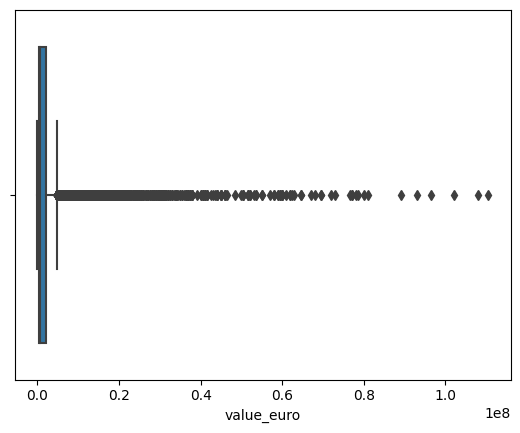

In [17]:
sns.boxplot(data=data, x="value_euro",dodge=True)

In [18]:
data['body_type'].value_counts()

body_type
Normal                 10393
Lean                    6468
Stocky                  1086
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: count, dtype: int64

In [19]:
px.scatter(data , x = 'potential' , y='value_euro' ,labels= {'potential': 'Potential rating',
                                                           'value_euro':"Market value of the player" })

In [20]:
px.scatter(data , x='potential' , y='overall_rating',labels={'potential': 'Market Value ',
                                                             'overall_rating': 'Overall Rating'})

In [21]:
px.scatter(data , y='value_euro' , x='overall_rating',labels={'potential': 'Market Value ',
                                                             'overall_rating': 'Overall Rating'})

<Axes: xlabel='acceleration', ylabel='body_type'>

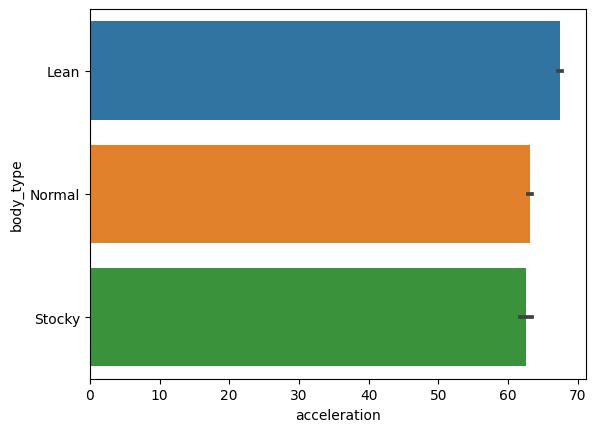

In [22]:
body_type = data[data['body_type'].isin(['Lean', 'Normal', 'Stocky'])]
sns.barplot(data = body_type ,y='body_type' , x ='acceleration')

# **Data Preprocessing**

**Drop Columns**

In [23]:
data =data.drop(columns = ['name','full_name', 'birth_date', 'nationality', 'value_euro', 'wage_euro', 'preferred_foot', 'release_clause_euro', 'national_team', 'national_rating', 'national_team_position', 'national_jersey_number'])

In [24]:
data.isnull().sum()

age                              0
height_cm                        0
weight_kgs                       0
positions                        0
overall_rating                   0
potential                        0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration                     0
sprint_speed                     0
agility                          0
reactions                        0
balance                          0
shot_power                       0
jumping                          0
stamina                          0
strength            

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17954 non-null  int64  
 1   height_cm                      17954 non-null  float64
 2   weight_kgs                     17954 non-null  float64
 3   positions                      17954 non-null  object 
 4   overall_rating                 17954 non-null  int64  
 5   potential                      17954 non-null  int64  
 6   international_reputation(1-5)  17954 non-null  int64  
 7   weak_foot(1-5)                 17954 non-null  int64  
 8   skill_moves(1-5)               17954 non-null  int64  
 9   body_type                      17954 non-null  object 
 10  crossing                       17954 non-null  int64  
 11  finishing                      17954 non-null  int64  
 12  heading_accuracy               17954 non-null 

**Encode the Categorical Columns**

In [26]:
data['body_type'].value_counts()

body_type
Normal                 10393
Lean                    6468
Stocky                  1086
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: count, dtype: int64

In [27]:
noise = ['Messi','PLAYER_BODY_TYPE_25','Akinfenwa','Shaqiri','Neymar','C. Ronaldo','Courtois']
data = data[~data['body_type'].isin(noise)]

In [28]:
data['body_type'].value_counts()

body_type
Normal    10393
Lean       6468
Stocky     1086
Name: count, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_columns = ['positions','body_type']
for i in cat_columns:
    data[i] = le.fit_transform(data[i])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17947 entries, 1 to 17953
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            17947 non-null  int64  
 1   height_cm                      17947 non-null  float64
 2   weight_kgs                     17947 non-null  float64
 3   positions                      17947 non-null  int64  
 4   overall_rating                 17947 non-null  int64  
 5   potential                      17947 non-null  int64  
 6   international_reputation(1-5)  17947 non-null  int64  
 7   weak_foot(1-5)                 17947 non-null  int64  
 8   skill_moves(1-5)               17947 non-null  int64  
 9   body_type                      17947 non-null  int64  
 10  crossing                       17947 non-null  int64  
 11  finishing                      17947 non-null  int64  
 12  heading_accuracy               17947 non-null  int6

**Target is “overall_rating” Column**

In [30]:
X = data.drop('overall_rating',axis=1)
y= data['overall_rating']

In [31]:
X.head()

,age,height_cm,weight_kgs,positions,potential,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,crossing,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
1,27,154.94,76.2,72,89,3,5,4,0,88,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,227,91,4,4,5,1,80,...,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,548,88,3,4,4,1,86,...,84,34,26,83,87,61,83,51,24,22
4,27,187.96,88.9,104,91,3,3,2,1,30,...,15,87,88,24,49,33,80,91,88,87
5,27,193.04,92.1,104,90,3,3,2,1,53,...,64,82,88,41,60,62,87,90,89,84


In [32]:
y.head()

1    88
2    88
3    88
4    88
5    88
Name: overall_rating, dtype: int64

In [33]:
print("Data Shape :", data.shape)

Data Shape : (17947, 39)


 **Standard Scaler**

In [34]:
np.max(data,axis=0)

age                               46.00
height_cm                        205.74
weight_kgs                       107.00
positions                        888.00
overall_rating                    91.00
potential                         95.00
international_reputation(1-5)      5.00
weak_foot(1-5)                     5.00
skill_moves(1-5)                   5.00
body_type                          2.00
crossing                          93.00
finishing                         94.00
heading_accuracy                  94.00
short_passing                     93.00
volleys                           90.00
dribbling                         95.00
curve                             94.00
freekick_accuracy                 93.00
long_passing                      93.00
ball_control                      95.00
acceleration                      97.00
sprint_speed                      96.00
agility                           95.00
reactions                         93.00
balance                           96.00


In [35]:
np.min(data,axis=0)

age                               17.0
height_cm                        152.4
weight_kgs                        49.9
positions                          0.0
overall_rating                    47.0
potential                         48.0
international_reputation(1-5)      1.0
weak_foot(1-5)                     1.0
skill_moves(1-5)                   1.0
body_type                          0.0
crossing                           5.0
finishing                          2.0
heading_accuracy                   4.0
short_passing                      7.0
volleys                            3.0
dribbling                          4.0
curve                              6.0
freekick_accuracy                  3.0
long_passing                       9.0
ball_control                       5.0
acceleration                      12.0
sprint_speed                      12.0
agility                           11.0
reactions                         24.0
balance                           16.0
shot_power               

**Split the Dataset into train , test split**

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [37]:
print ("X_train Shape :",X_train.shape)
print ("y_train Shape :",y_train.shape)
print ("X_test Shape :",X_test.shape)
print ("y_test Shape :",y_test.shape)

X_train Shape : (14357, 38)
y_train Shape : (14357,)
X_test Shape : (3590, 38)
y_test Shape : (3590,)


# **Models Building (linear regression, knn, svr, random forest, decision tree, adaboost, xgboost)**

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [39]:
models = { "Linear Regression" : LinearRegression(),
          "KNeighbors Regressor" : KNeighborsRegressor(),
          "SVR" : SVR(),
          "Random Forest Regressor" : RandomForestRegressor(),
          "Decision Tree Regressor" : DecisionTreeRegressor(),
          "XG Boost Regressor" : XGBRegressor(),
          "Ada Boost Regressor" : AdaBoostRegressor()
}

# **Models Evaluation**

In [40]:
from sklearn.metrics import r2_score ,mean_absolute_error , mean_squared_error 

In [41]:
def evaluate_model(actual, predicted):
    r2score = r2_score(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    residuals = actual - predicted

    return r2score, mse , rmse ,mae , residuals

In [42]:
models_list = []
train_scores = []
test_scores = []
for i in range (len(list(models))):
    model = list(models.values())[i]
    #fitting the models
    model.fit(X_train ,y_train)
    models_list.append(list(models.keys())[i])
    print("-----------------------",list(models.keys())[i],"-----------------------")
    #Prediction
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    #Model Performance Training
    train_score, train_mse, train_rmse, train_mae, residuals_train= evaluate_model(y_train, train_pred)
    train_scores.append(train_score)
    print("Model Training Peformance: ")
    print("R2 Score :",train_score)
    print("Training Mean Squared Error :",train_mse)
    print("Training Square Root Mean Squared Error :",train_rmse)
    print("Training Mean Absolute Error :",train_mae)

    #Model Performance Testing
    test_score, test_mse, test_rmse, test_mae, residuals_test= evaluate_model(y_test, test_pred)
    print("Model Testing Peformance: ")
    print("Testing R2 Score :",test_score)
    print("Testing Mean Squared Error :",test_mse)
    print("Testing Square Root Mean Squared Error :",test_rmse)
    print("Testing Mean Absolute Error :",test_mae)


    test_scores.append(test_score)


----------------------- Linear Regression -----------------------
Model Training Peformance: 
R2 Score : 0.9092792076331654
Training Mean Squared Error : 4.374921356109056
Training Square Root Mean Squared Error : 2.091631266765023
Training Mean Absolute Error : 1.6243002581674064
Model Testing Peformance: 
Testing R2 Score : 0.9119714490438211
Testing Mean Squared Error : 4.280444308288803
Testing Square Root Mean Squared Error : 2.06892346602981
Testing Mean Absolute Error : 1.6268842222111695
----------------------- KNeighbors Regressor -----------------------
Model Training Peformance: 
R2 Score : 0.9345065764732263
Training Mean Squared Error : 3.1583562025492795
Training Square Root Mean Squared Error : 1.7771764691637348
Training Mean Absolute Error : 1.3448909939402387
Model Testing Peformance: 
Testing R2 Score : 0.9036848144928799
Testing Mean Squared Error : 4.683387186629527
Testing Square Root Mean Squared Error : 2.1641134874653702
Testing Mean Absolute Error : 1.63298050

**XG Boost Regressor and Random Forest Regressor have the highest Training and Testing Scores**

XG Boost Regressor Testing R2 Score : 0.9759703124596631


Random Forest Regressor Testing R2 Score : 0.9729441794766369



**Top 5 Training Residuals for every Model**

In [43]:
for i in range (len(list(models))):
    print("-----------------------",list(models.keys())[i],"-----------------------")
    print("Training Residuals top(5):")
    print("Index    Residuals")
    print(residuals_train.nlargest(5))


----------------------- Linear Regression -----------------------
Training Residuals top(5):
Index    Residuals
15412    6.711891
17599    6.619342
17613    6.619342
16069    6.415237
2731     6.410493
Name: overall_rating, dtype: float64
----------------------- KNeighbors Regressor -----------------------
Training Residuals top(5):
Index    Residuals
15412    6.711891
17599    6.619342
17613    6.619342
16069    6.415237
2731     6.410493
Name: overall_rating, dtype: float64
----------------------- SVR -----------------------
Training Residuals top(5):
Index    Residuals
15412    6.711891
17599    6.619342
17613    6.619342
16069    6.415237
2731     6.410493
Name: overall_rating, dtype: float64
----------------------- Random Forest Regressor -----------------------
Training Residuals top(5):
Index    Residuals
15412    6.711891
17599    6.619342
17613    6.619342
16069    6.415237
2731     6.410493
Name: overall_rating, dtype: float64
----------------------- Decision Tree Regressor -

**Top 5 Testing Residuals for every Model**

In [44]:
   for i in range (len(list(models))):
    print("-----------------------",list(models.keys())[i],"-----------------------")
    print(list(models.keys())[i])
    print("Testing Residuals top (5) :")
    print("Index    Residuals")
    print(residuals_test.nlargest(5))


----------------------- Linear Regression -----------------------
Linear Regression
Testing Residuals top (5) :
Index    Residuals
6        6.725177
16655    6.696953
91       6.331191
191      6.167989
1533     6.118182
Name: overall_rating, dtype: float64
----------------------- KNeighbors Regressor -----------------------
KNeighbors Regressor
Testing Residuals top (5) :
Index    Residuals
6        6.725177
16655    6.696953
91       6.331191
191      6.167989
1533     6.118182
Name: overall_rating, dtype: float64
----------------------- SVR -----------------------
SVR
Testing Residuals top (5) :
Index    Residuals
6        6.725177
16655    6.696953
91       6.331191
191      6.167989
1533     6.118182
Name: overall_rating, dtype: float64
----------------------- Random Forest Regressor -----------------------
Random Forest Regressor
Testing Residuals top (5) :
Index    Residuals
6        6.725177
16655    6.696953
91       6.331191
191      6.167989
1533     6.118182
Name: overall_r

**Get the indices of the top 10 most off predictions in the test set
 Print the top 10 most off predictions in the test set and their corresponding names**

In [46]:
for i in range (len(list(models))):
    print("-----------------------",list(models.keys())[i],"-----------------------")
    print("top 10 most off predictions in the train set and their corresponding names")
    top_10_indices_test = residuals_test.nlargest(10).index
    top_10_errors = data.loc[top_10_indices_test]
    print("Top 10 most off predictions:")
    for index, row in top_10_errors.iterrows():
        print(f"Indices : {index} and value : {row} " )

----------------------- Linear Regression -----------------------
top 10 most off predictions in the train set and their corresponding names
Top 10 most off predictions:
Indices : 6 and value : age                               20.0
height_cm                        152.4
weight_kgs                        73.0
positions                        800.0
overall_rating                    88.0
potential                         95.0
international_reputation(1-5)      3.0
weak_foot(1-5)                     4.0
skill_moves(1-5)                   5.0
body_type                          0.0
crossing                          77.0
finishing                         88.0
heading_accuracy                  77.0
short_passing                     82.0
volleys                           78.0
dribbling                         90.0
curve                             77.0
freekick_accuracy                 63.0
long_passing                      73.0
ball_control                      91.0
acceleration              

**Get the indices of the top 10 most off predictions in the training set
Print the top 10 most off predictions in the training set and their corresponding names**

In [47]:
   for i in range (len(list(models))):
    print("-----------------------",list(models.keys())[i],"-----------------------")
    print("top 10 most off predictions in the train set and their corresponding names")
    top_10_indices_train = residuals_train.nlargest(10).index
    top_10_errors = data.loc[top_10_indices_train]
    print("Top 10 most off predictions:")
    for index, row in top_10_errors.iterrows():
        print(f"Indices : {index} and value : {row} " )

----------------------- Linear Regression -----------------------
top 10 most off predictions in the train set and their corresponding names
Top 10 most off predictions:
Indices : 15412 and value : age                               19.00
height_cm                        167.64
weight_kgs                        67.10
positions                        674.00
overall_rating                    72.00
potential                         79.00
international_reputation(1-5)      1.00
weak_foot(1-5)                     4.00
skill_moves(1-5)                   3.00
body_type                          1.00
crossing                          68.00
finishing                         62.00
heading_accuracy                  50.00
short_passing                     72.00
volleys                           57.00
dribbling                         77.00
curve                             72.00
freekick_accuracy                 69.00
long_passing                      62.00
ball_control                      77.00
ac